In [1]:
import sys
sys.executable

'/opt/anaconda3/bin/python3'

In [2]:
### Description of US Countrywide Traffic Accident Dataset(2016 - 2019)
# Source: https://www.kaggle.com/sobhanmoosavi/us-accidents/download

# Import Required Libraries (expand as needed)
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import tensorflow as tf
import scipy.stats as stats
import datetime
import nltk
from IPython.display import display
import statsmodels.api as sm
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, accuracy_score
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder


from tempfile import TemporaryDirectory
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsTransformer, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.pipeline import Pipeline
%matplotlib inline

## Load pre-cleaned dataset
#sys.path.append('/content/drive/My Drive/MSSM/ML_for_BDS')   #change working directory

In [3]:
db = pd.read_csv('/Users/ShaunPorwal/Desktop/sinai_classes/BMI3002_ML_2020/MLProject/clean_US_accidents_2019.zip')
#Check for Nan values
#print(db.isnull().sum())

In [4]:
#Set up data for Feature Selection & Model Building
X = db.drop("Severity",1)   #Feature Matrix
y = db["Severity"]          #Target Variable

In [5]:
# Set the list of features to include in Machine Learning
feature_list=['Source','TMC','Severity','Start_Lng','Start_Lat','Distance(mi)','Side','City','County','State',
             'Timezone','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Weather_Condition',
             'Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming',
             'Traffic_Signal','Turning_Loop','Sunrise_Sunset','Civil_Twilight', 'Month', 'Nautical_Twilight', 'Astronomical_Twilight',
              'Hour','Weekday', 'Time_Duration(min)']

In [6]:
# Duplicate dataset with only feature list columns
db_ftl= db[feature_list].copy()
#db_ftl.info()

In [7]:
db_ftl.shape

(2246264, 39)

In [8]:
##Select State of Interest
# Set state
state='NY'

# Select the state of New York
NY_acc = db_ftl.loc[db_ftl.State==state].copy()
NY_acc.drop('State', axis=1, inplace=True)
#NY_acc.info()
#NY_acc.head(2)

In [9]:
#Create dummies to deal with categorical data
NY_db_dummy = pd.get_dummies(NY_acc, drop_first=True)
#print(NY_db_dummy.info())
NY_db_dummy.head(2)

,TMC,Severity,Start_Lng,Start_Lat,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),...,Month_Oct,Month_Sep,Nautical_Twilight_Night,Astronomical_Twilight_Night,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed
194255,241.0,3,-74.169876,41.139324,0.01,53.1,51.326849,93.0,29.81,1.0,...,0,0,0,0,0,0,0,0,0,1
194256,201.0,3,-74.159744,41.118748,2.53,53.1,51.326849,93.0,29.83,1.0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
#Create dummies to deal with categorical data
cat_columns = ['Source', 'Side',	'City',	'County',	'Timezone',\
                'Sunrise_Sunset', 'Civil_Twilight',	'Month',\
                'Nautical_Twilight', 'Astronomical_Twilight', 'Weekday',\
                'Wind_Direction',	'Weather_Condition', 'Amenity', 'Bump',\
                'Crossing', 'Give_Way', 'Junction','No_Exit', 'Railway',\
                'Roundabout', 'Station', 'Stop','Traffic_Calming',\
                'Traffic_Signal', 'Turning_Loop']
NY_db_dummy = pd.get_dummies(NY_acc, columns = cat_columns, drop_first = True)
NY_db_dummy.head(2)

,TMC,Severity,Start_Lng,Start_Lat,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),...,Crossing_True,Give_Way_True,Junction_True,No_Exit_True,Railway_True,Roundabout_True,Station_True,Stop_True,Traffic_Calming_True,Traffic_Signal_True
194255,241.0,3,-74.169876,41.139324,0.01,53.1,51.326849,93.0,29.81,1.0,...,0,0,0,0,0,0,0,0,0,0
194256,201.0,3,-74.159744,41.118748,2.53,53.1,51.326849,93.0,29.83,1.0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Assign the data
gg = NY_db_dummy

# Set the target for the prediction
target='Severity'

# Create arrays for the features and the response variable
# set X and y
y = gg[target]
X = gg.drop(target, axis=1)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (76608, 1108)
Training labels shape:  (76608,)
Test data shape:  (32833, 1108)
Test labels shape:  (32833,)


In [12]:
#Scale data before usage
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# List of classification algorithms
algor_list=['Random Forest', 'Logistic Regression',' K-Nearest Neighbors','Decision Tree','Naive Bayes', 'AdaBoost', 'MLP Nueral Net']

# Initialize an empty list for the accuracy for each algorithm
accuracy_list=[]

Classifier #1: Random Forest

In [14]:
# Random Forest 
#Create Gaussian Classifier
rf_clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_clf.fit(X_train,y_train)

#Predict severity
y_pred=rf_clf.predict(X_test)

#Obtain accuracy score
acc_score=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_list.append(acc_score)

# Model Accuracy, how often is the classifier correct?
print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc_score))

#Print confusion matrix and other meterics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[Randon forest algorithm] accuracy_score: 0.876.
[[    0     5     2     0]
 [    0 17176  2033     0]
 [    0  1987 11595     0]
 [    0     7    28     0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.90      0.89      0.89     19209
           3       0.85      0.85      0.85     13582
           4       0.00      0.00      0.00        35

    accuracy                           0.88     32833
   macro avg       0.44      0.44      0.44     32833
weighted avg       0.88      0.88      0.88     32833



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
#Check class labels
print((y==1).sum(), (y==2).sum(), (y==3).sum(), (y==4).sum())

22 64029 45272 118


No handles with labels found to put in legend.


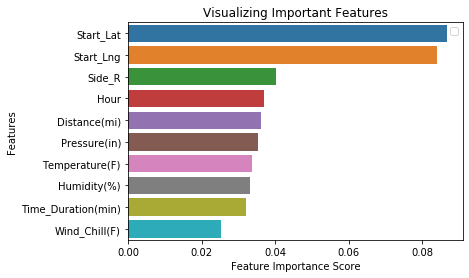

In [16]:
#Asses RF feature importance
feature_imp = pd.Series(rf_clf.feature_importances_,index=X.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.03
sfm = SelectFromModel(rf_clf, threshold=0.03)

# Train the selector
sfm.fit(X_train, y_train)

feat_labels=X.columns

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

Classifier #2: Logistic Regression

In [ ]:
# Logistic regression
lr = LogisticRegression(max_iter=1000, random_state=0)

#Fit/Train 
lr.fit(X_train,y_train)

#Predict severity
y_pred = lr.predict(X_test)

#Get the accuracy score
acc_score=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_list.append(acc_score)

print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc_score))

#Print confusion matrix and other meterics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Classifier #3 K-Nearest Neighbors

In [ ]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

In [ ]:
#create new a knn model
knn_clf = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 10)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn_clf, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X, y)

#check top performing n_neighbors value
print(knn_cv.best_params_)
print(knn_cv.best_score_)

In [ ]:
#Create k-nn classifier using "best" value of k
#knn_clf = KNeighborsClassifier(n_neighbors= knn_cv.best_score_)
knn_clf = KNeighborsClassifier(n_neighbors= 4, algorithm='kd_tree', n_jobs=-2)

#Fit/Train classifier
knn_clf.fit(X_train, y_train)

#Predict severity
y_pred = knn_clf.predict(X_test)

#Get accuracy score
acc_score = accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_list.append(acc_score)

print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc_score))

#Print confusion matrix and other meterics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Classifier #4: Decision Tree

In [ ]:
#Decision Tree
#can use entropy or gini(default)
dt_clf = DecisionTreeClassifier(criterion="entropy") 
#Train Decision Tree Classifer
dt_clf = dt_clf.fit(X_train,y_train)

#Predict severity for test dataset
y_pred = dt_clf.predict(X_test)

#Evaluate accuracy_entropy
acc_score= accuracy_score(y_test, y_pred)

#Append to the accuracy list
accuracy_list.append(acc_score)

#Print accuracy_gini
print('[Decision Tree] accuracy_score: {:.3f}.'.format(acc_score))

#Print confusion matrix and other meterics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Classifier #5: AdaBoost Classifier


In [ ]:
#AdaBoost Classifier
#Use SVC as a estimator
svc=SVC(probability=True, kernel='linear')

ad_clf = AdaBoostClassifier(base_estimator=svc)

#Train Classifier
ad_clf.fit(X_train, y_train)

#Predict Severity
y_pred = ad_clf.predict(X_test)

#Evaluate accuracy
acc_score = accuracy_score(y_test, y_pred)

#Append to the accuracy list
accuracy_list.append(acc_score)

#Print accuracy_gini
print('[AdaBoost Classifier] accuracy_score: {:.3f}.'.format(acc_score))

#Print confusion matrix and other meterics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Classifier #6 Naive Bayees Classifier

In [ ]:
#Gausian Naive Bayees
gb_clf = GaussianNB()

#Train 
gb_clf.fit(X_train, y_train)

#Predict
y_pred = gb_clf.predict(X_test)

#Evaluate
acc_score= accuracy_score(y_test, y_pred)

#Append to the accuracy list
accuracy_list.append(acc_score)

print('[Naive Bayees] accuracy_score: {:.3f}.'.format(acc_score))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Classifier #7: MLP Nueral Net


In [ ]:
#MLP Nueral Net
#Set up MLP and assign gidden layers
mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20,20,20))

#Train Net
mlp_clf.fit(X_train, y_train)

#Predict
y_pred = mlp_clf.predict(X_test)

#Evaluate
acc_score= accuracy_score(y_test, y_pred)

#Append to the accuracy list
accuracy_list.append(acc_score)

#Print accuracy_gini
print('[MLP Neural Net] accuracy_score: {:.3f}.'.format(acc_score))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Let's compare Alogrithms

In [ ]:
# Plot to compare accuracy scores of different algorithms

# Generate a list of ticks for y-axis
y_ticks=np.arange(len(algor_list))

# Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
severity_acc=pd.DataFrame(list(zip(algor_list, accuracy_list)), columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)

# Export to a file
# severity_acc.to_csv('Accuracy_scores_algorithms_{}.csv'.format(state),index=False)

# Make a plot
ax=severity_acc.plot.barh('Algorithm', 'Accuracy_Score', align='center',legend=False,color='0.5')


# Add the data label on to the plot
for i in ax.patches:
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Set the limit, lables, ticks and title
plt.xlim(0,1.1)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, severity_acc['Algorithm'], rotation=0)
plt.title('Accuracy across Algorithms')

plt.show()